
	BMO Fonds FNB actions du Nasdaq 100
	BMO Nasdaq 100 Equity ETF Series A
slope 15.43%/yr, rms 12.91%, début 2021-06-01, fin 2025-08-28

	BMO Fonds FNB d'actions américaines
	BMO US Equity ETF A
slope 10.40%/yr, rms 8.55%, début 2018-01-02, fin 2025-08-28

	BMO Fonds FNB d'actions canadiennes
	BMO FNB d'actions canadiennes
slope 6.87%/yr, rms 7.11%, début 2018-01-02, fin 2025-08-28

	BMO Fonds FNB d'actions internationales
	BMO International Equity ETF A
slope 7.81%/yr, rms 6.83%, début 2018-01-02, fin 2025-08-28

	BMO Fonds de dividendes
	BMO Dividend Fund
slope -10.17%/yr, rms 1.81%, début 2015-09-29, fin 2016-01-04

	BMO Port croissance FiducieSélect
	BMO Port act croiss FiducieSélect D
slope 3.76%/yr, rms 7.28%, début 2018-01-02, fin 2023-09-18

	BMO Portefeuille FNB à revenu fixe
	BMO FNB Portefeuille à revenu fixe D
slope -2.49%/yr, rms 5.27%, début 2018-01-02, fin 2023-09-18


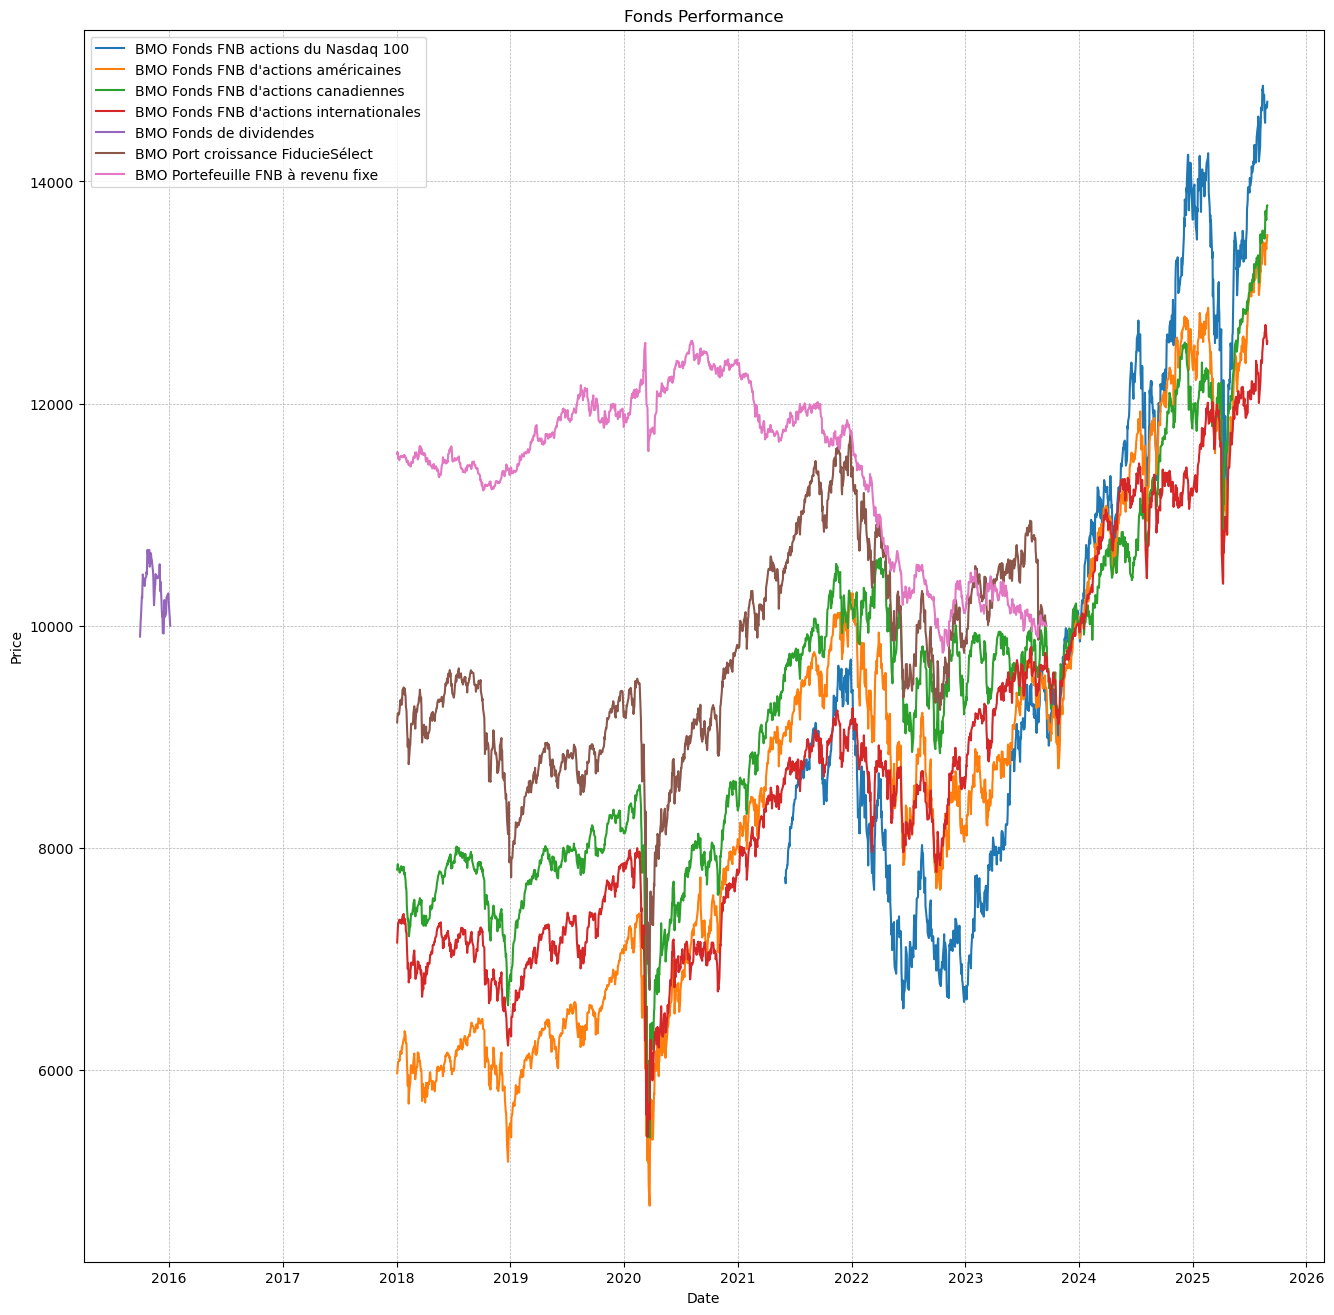

In [25]:
import bydoux_tools as bt
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.time import Time,TimeDelta
import numpy as np


path_to_fonds_myriam = "/Users/eartigau/bydoux/fonds_myriam.csv"
tbl_fonds = Table.read(path_to_fonds_myriam, format='csv', delimiter='&')
tbl_fonds['PARTS'] = tbl_fonds['PARTS'].astype(float)

tbl_fonds2 = Table()
tbl_fonds2['FOND'] = np.unique(tbl_fonds['FOND'])
tbl_fonds2['TICKER'] = np.zeros(len(tbl_fonds2), dtype=tbl_fonds['TICKER'].dtype)
tbl_fonds2['PARTS'] = 0.0
for ufond in tbl_fonds2['FOND']:
    mask = tbl_fonds['FOND'] == ufond
    tbl_fonds2['PARTS'][tbl_fonds2['FOND'] == ufond] = np.sum(tbl_fonds['PARTS'][mask])
    tbl_fonds2['TICKER'][tbl_fonds2['FOND'] == ufond] = tbl_fonds['TICKER'][mask][0]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))
for iticker in range(len(tbl_fonds2)):
    tbl = bt.read_quotes(tbl_fonds2['TICKER'][iticker])
    info  = bt.get_info(tbl_fonds2['TICKER'][iticker])

    imin = np.argmin(np.abs(tbl['mjd']-60310))
    tbl['Close'] = tbl['Close']/tbl['Close'][imin]
    tbl['Close']*=10000

    #print(tbl['date'][-1],tbl_fonds['TICKER'][iticker],tbl_fonds['FOND'][iticker])
    tbl['time_plot'] = Time(tbl['mjd'], format='mjd').datetime

    ax.plot(tbl['time_plot'], tbl['Close'], label=tbl_fonds2['FOND'][iticker])

    x = tbl['mjd']/365.24
    y = tbl['log_close']
    fit = np.polyfit(x, y, 1)
    slope = fit[0]
    rms = np.nanstd(y - (slope * x + fit[1]))
    print('\n\t'+tbl_fonds2['FOND'][iticker])
    print('\t'+info['longName'])
    print(f'slope {slope*100:.2f}%/yr, rms {rms*100:.2f}%, début {tbl["date"][0].split(" ")[0]}, fin {tbl["date"][-1].split(" ")[0]}')

ax.grid()
ax.grid(which='both', linestyle='--', linewidth=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Fonds Performance')
ax.legend()
plt.show()